In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dowhy
from dowhy import CausalModel
import statsmodels.formula.api as smf
from sklearn import model_selection
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import seaborn as sb

In [97]:
#load, clean, explore ihdp
df_ihdp = pd.read_csv("https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv")
df_ihdp = df_ihdp.dropna()
#df_ihdp
df_ihdp.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [98]:
#overview of the data
df_ihdp.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000,747.000000,...,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.448082e-17,4.755975e-18,-2.377988e-17,-5.612051e-16,4.280378e-17,-7.633341e-16,0.514056,0.093708,0.520750,0.364123,...,0.135207,0.156627,0.081660,0.073628,0.128514,0.157965,0.186078,3.159538,5.696107,4.016067
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500137,0.291618,0.499904,0.481506,...,0.342174,0.363692,0.274029,0.261339,0.334886,0.364953,0.389430,2.179956,1.980121,0.859736
min,-2.731287e+00,-3.800823e+00,-1.850350e+00,-8.796060e-01,-5.130428e+00,-1.851480e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.543902,-1.037628,-1.866989
25%,-6.669461e-01,-6.027100e-01,-7.332610e-01,-8.796060e-01,-5.666720e-01,-8.577868e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626779,5.053598,3.775936
50%,1.652752e-01,1.968181e-01,-3.608980e-01,1.617025e-01,1.210172e-01,-2.970882e-02,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.577294,6.209686,4.304433
75%,8.137593e-01,5.965822e-01,7.561910e-01,1.617025e-01,6.836721e-01,6.327536e-01,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.494637,6.948922,4.569454
max,1.505476e+00,2.595403e+00,2.990369e+00,2.244320e+00,2.371637e+00,2.951372e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.268228,10.171004,4.670125


In [21]:
df_ihdp.groupby('t')['ite'].agg(['median', 'mean'])

,median,mean
t,,
0.0,4.335205,4.01974
1.0,4.219023,4.00000


t
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ite, dtype: object

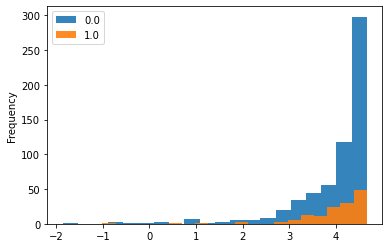

In [31]:
df_ihdp.groupby('t')['ite'].plot(kind='hist', bins=20, alpha=.9, legend=True)

t
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: yf, dtype: object

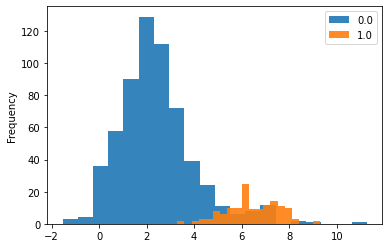

In [32]:
df_ihdp.groupby('t')['yf'].plot(kind='hist', bins=20, alpha=.9, legend=True)

t
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ycf, dtype: object

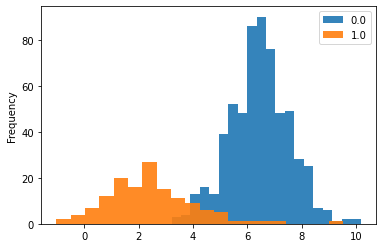

In [33]:
df_ihdp.groupby('t')['ycf'].plot(kind='hist', bins=20, alpha=.9, legend=True)

In [35]:
#load jobs
df_jobs = pd.read_csv("https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/jobs.csv")
df_jobs = df_jobs.dropna()
#df_jobs
df_jobs.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0


In [36]:
#overview of the data
df_jobs.describe()



,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
count,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000
mean,2.001996e-16,-2.068361e-16,0.374222,0.048879,0.707970,0.411893,-1.106075e-17,-1.017589e-16,-1.106075e-17,1.762973e-14,4.424301e-17,-2.212150e-17,2.079421e-16,0.168742,0.167497,1.216683e-16,0.010897,0.092466,0.849938,0.224782
std,1.000000e+00,1.000000e+00,0.483997,0.215649,0.454767,0.492253,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.374582,0.373477,1.000000e+00,0.103833,0.289727,0.357188,0.417504
min,-1.461095e+00,-3.986840e+00,0.000000,0.000000,0.000000,0.000000,-1.147411e+00,-1.110467e+00,-1.164047e+00,-9.488316e-01,-2.143974e+00,-5.580568e-01,-5.188151e-01,0.000000,0.000000,-9.799811e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.024627e-01,-5.796108e-01,0.000000,0.000000,0.000000,0.000000,-8.923385e-01,-9.139141e-01,-7.852843e-01,-7.434072e-01,-6.707297e-01,-5.423814e-01,-5.098380e-01,0.000000,0.000000,-8.142367e-01,0.000000,0.000000,1.000000,0.000000
50%,-3.320111e-01,1.018350e-01,0.000000,0.000000,1.000000,0.000000,-8.521244e-02,-8.346011e-02,-4.355556e-01,-4.998533e-01,-2.250229e-02,-2.862214e-01,-2.737369e-01,0.000000,0.000000,-2.035020e-01,0.000000,0.000000,1.000000,0.000000
75%,7.970728e-01,4.425579e-01,1.000000,0.000000,1.000000,1.000000,5.506613e-01,5.629081e-01,6.730184e-01,5.267384e-01,3.458087e-01,1.366588e-01,1.318304e-01,0.000000,0.000000,4.539777e-01,0.000000,0.000000,1.000000,0.000000
max,2.114337e+00,1.805449e+00,1.000000,1.000000,1.000000,1.000000,8.751987e+00,1.016507e+01,2.446737e+00,2.773336e+00,2.113702e+00,2.305284e+01,2.902264e+01,1.000000,1.000000,7.136030e+00,1.000000,1.000000,1.000000,1.000000


In [39]:
df_jobs.groupby('t')['y'].agg(['median', 'mean'])

,median,mean
t,,
0.0,1.0,0.857633
1.0,1.0,0.774411


t
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: y, dtype: object

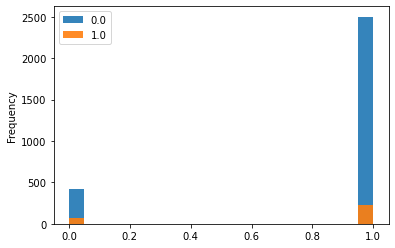

In [51]:
df_jobs.groupby('t')['y'].plot(kind='hist', bins=20, alpha=.9, legend=True)

t
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: e, dtype: object

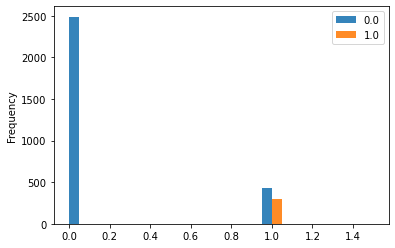

In [54]:
df_jobs.groupby('t')['e'].plot(kind='hist', bins=20, alpha=.9, legend=True)

In [61]:
v = df_ihdp[df_ihdp.t == 1]
b = df_ihdp[df_ihdp.t == 0]
estimated_effect = v.ite.mean() - b.ite.mean()
estimated_effect


-0.019740084540128322

<AxesSubplot:xlabel='yf', ylabel='ycf'>

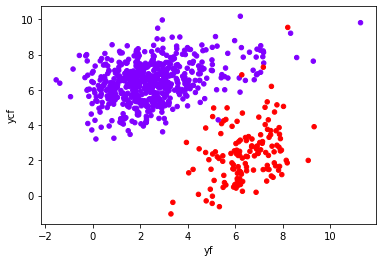

In [58]:
df_ihdp.plot.scatter(x="yf", y="ycf", c="t", cmap="rainbow", colorbar=False)

In [62]:
array = df_ihdp.values
X = array[:,0:8]
Y = array[:,8]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.692 (0.035)


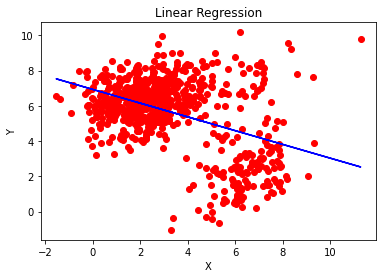

In [69]:
X_train = df_ihdp.loc[:,["yf"]].values
y_train = df_ihdp.loc[:,["ycf"]].values
regressor = LinearRegression()
regressor.fit(X_train,y_train)
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


<AxesSubplot:xlabel='y', ylabel='Density'>

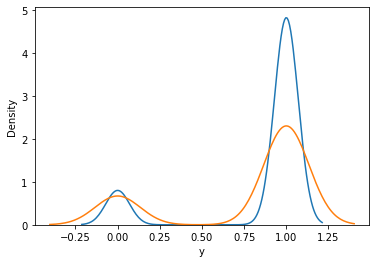

In [68]:
sb.kdeplot(df_jobs.loc[lambda df: df.t == 0].y, label="untreated")
sb.kdeplot(df_jobs.loc[lambda df: df.t == 1].y, label="treated")

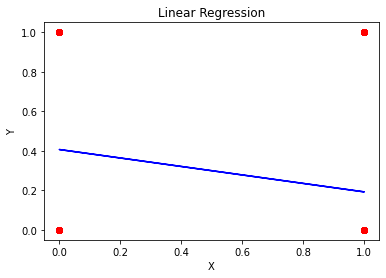

In [70]:
X_train = df_jobs.loc[:,["y"]].values
y_train = df_jobs.loc[:,["e"]].values
regressor = LinearRegression()
regressor.fit(X_train,y_train)
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
# matrics

In [92]:
# Absolute error for the Average Treatment Effect
def abs_ate(effect_true, effect_pred):
    return np.abs(np.mean(effect_pred) - np.mean(effect_true))

#Precision in Estimating the Heterogeneous Treatment Effect
def pehe(effect_true, effect_pred):
    return np.sqrt(np.mean((effect_pred - effect_true)**2))

In [ ]:
xs = ""
for i in range(1,26):
    xs += ("x"+str(i)+"+")
 
model=CausalModel(
        data = df_ihdp,
        treatment='t',
        outcome='yf',
        common_causes=xs.split('+')
        )
 
#Identify the causal effect
identified_estimand = model.identify_effect()

data_1 = df_ihdp[df_ihdp["t"]==1]
data_0 = df_ihdp[df_ihdp["t"]==0]
print("ATE", np.mean(data_1["yf"])- np.mean(data_0["yf"]))

estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_weighting")

print("Causal Estimate is " + str(estimate.value))

In [ ]:
xs = ""
for i in range(1,26):
    xs += ("x"+str(i)+"+")
 
model=CausalModel(
        data = data,
        treatment='t',
        outcome='y',
        common_causes=xs.split('+')
        )
 
#Identify the causal effect
identified_estimand = model.identify_effect()

data_1 = df_jobs[df_jobs["t"]==1]
data_0 = df_jobs[df_jobs["t"]==0]
print("ATE", np.mean(data_1["y"])- np.mean(data_0["y"]))

estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_weighting")

print("Causal Estimate is " + str(estimate.value))